# DS Classification Project: SMS Spam Classifier

In [1]:
# Data Set: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [66]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the File

df = pd.read_csv("DataSet\\spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Checking teh shape

df.shape

(5572, 5)

## Data Cleaning

In [6]:
# Checking the coulumns and Null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping the irrelevant columns that are Null

df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True) 
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Renaming the columns

df.rename(columns={'v1' : 'label', 'v2' : 'text'}, inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Changing the label column text into numbers

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [10]:
# ham -> 0,  Spam -> 1

df['label'] = en.fit_transform(df['label'])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Checking the Missing values

df.isnull().sum()

label    0
text     0
dtype: int64

In [12]:
# Checking the Duplicate Values

df.duplicated().sum()

403

In [13]:
# removing the Duplicate Values

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
# Checking the shape of Data-frame

df.shape

(5169, 2)

## EDA

In [15]:
# Checking the number of ham and spam messages

df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

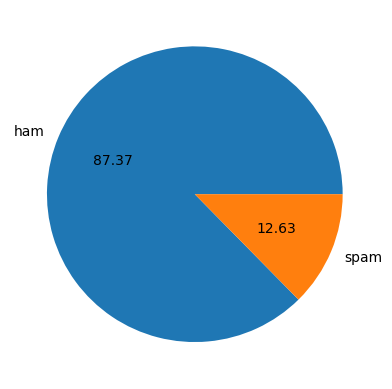

In [ ]:
# Plotting the label column using pie-chart

plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [17]:
# From the above chart we can say that data is imbalanced.

In [38]:
# Importing the nltk library

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [39]:
# Checking the alphabets, words and sentences in the SMS
# Foe this we can create three new columns (no. of characters, no.of words, no.of sentences)

# Creating the Number of Characters column

df['num_characters'] = df['text'].apply(len)
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
# Creating the Number of Words column

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
# Creating the Number of Sentences column

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
# Checking the statistics of (num_characters, num_words, num_sentences)

df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
# Checking the statistics of (num_characters, num_words, num_sentences) of ham messages

df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
# Checking the statistics of (num_characters, num_words, num_sentences) of spam messages

df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


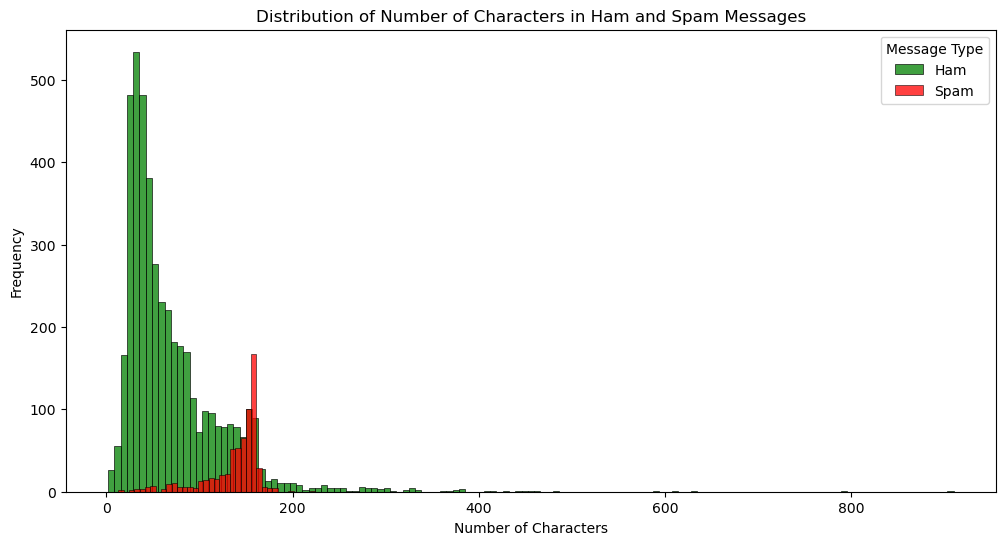

In [ ]:
# Plotting the histogram of no. of characters of ham and spam messages 


plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'], color='green', label='Ham', kde=False)  # Ham
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='Spam', kde=False)  # Spam

plt.legend(title='Message Type')

plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters in Ham and Spam Messages')

plt.show()


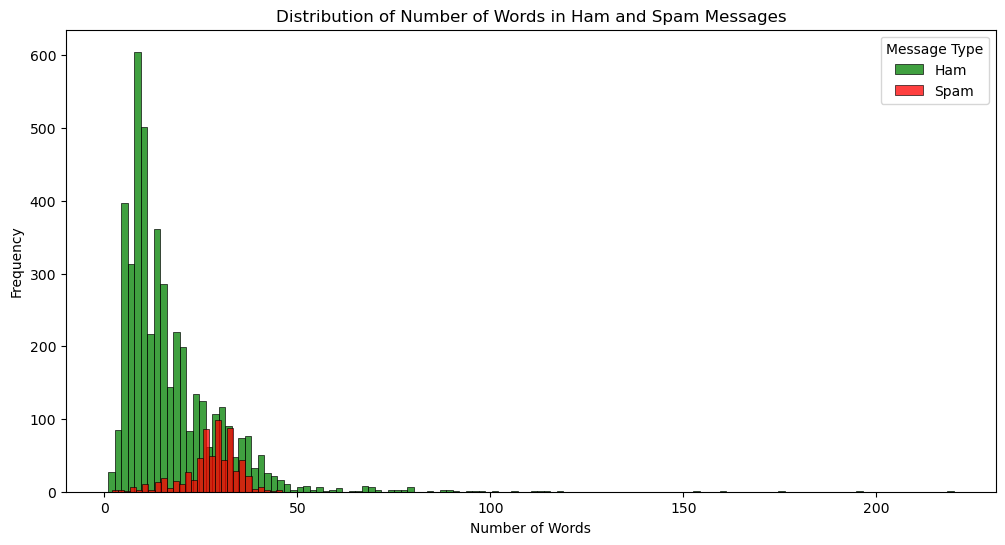

In [ ]:
# Plotting the histogram of no. of words of ham and spam messages 


plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'], color='green', label='Ham', kde=False)  # Ham
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='Spam', kde=False)  # Spam

plt.legend(title='Message Type')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Ham and Spam Messages')

plt.show()

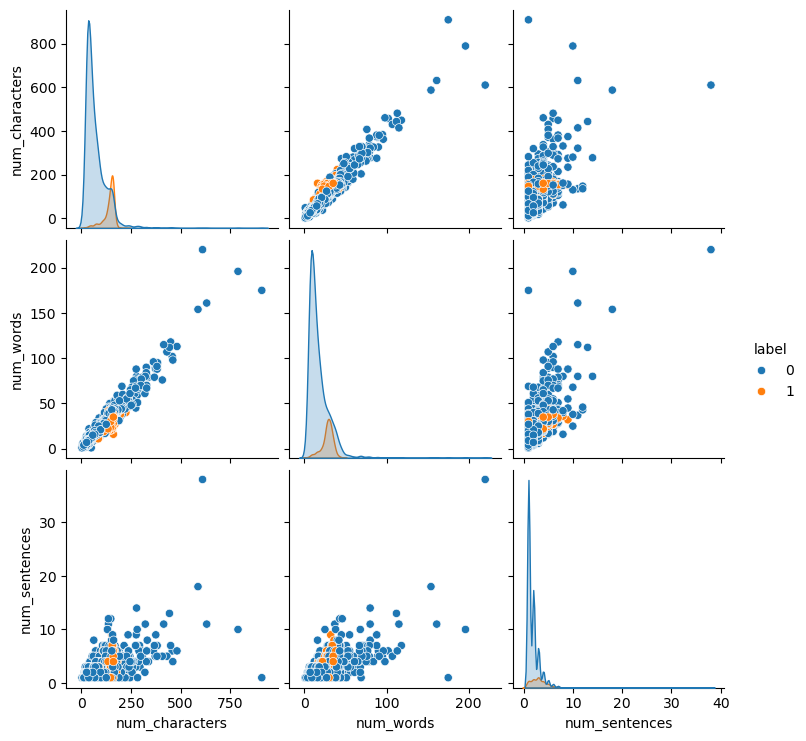

In [69]:
# Checking the relationships of columns

sns.pairplot(df, hue='label')

In [82]:
# Checking the co-relations

df[['label', 'num_characters', 'num_words', 'num_sentences']].corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

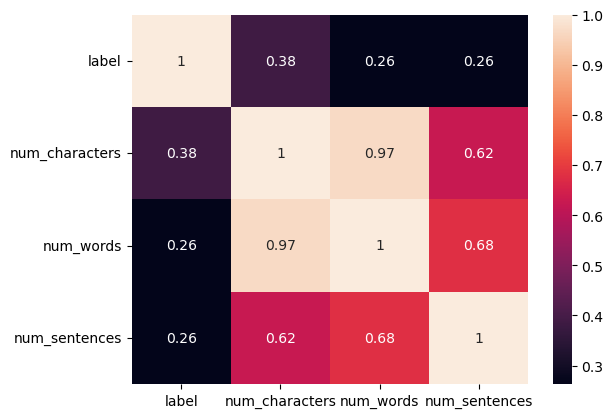

In [81]:
# Checking the co-relations

sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)